In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../data/tweets_final.csv')

## Data Understanding

In [3]:
df.shape

(632, 11)

In [4]:
df.head()

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
0,989495919941844992,Christopher S. Penn,@cspenn,AI,Trans rights are human rights. Black Lives Mat...,2024-01-19,23:59,1,1,0,NaN
1,1710813550208319488,AI Automations Experimental,@ai_automations,AI,Stillness and Urbanity The Ocean Collides with...,2024-01-19,23:59,0,0,0,NaN
2,1708477135986274304,moh:ai:r,@moh_ai_r,AI,International Fetish Day #mohair #mohairsweate...,2024-01-19,23:59,0,0,0,NaN
3,1663309436079996928,Brian Colburn,@CoachBColburn,AI,Don't miss our Live AI Demonstration on 01/25/...,2024-01-19,23:59,1,0,0,AI Demonstration
4,1518409838220525568,Entrepreneur_cm,@entrepreneur_cm,AI,Selkie founder defends use of AI in new dress ...,2024-01-19,23:58,1,0,0,AI fashion design


In [5]:
df.describe()

,likes,comments,reposts
count,632.000000,632.000000,632.000000
mean,1.014241,0.213608,0.180380
std,3.319937,0.759684,0.968143
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,42.000000,9.000000,11.000000


In [6]:
df.describe(include='object')

,profile_id,name,username,topic,text,date,time,theme
count,632,632,632,632,632,632,632,464
unique,519,522,522,5,619,4,323,442
top,1608769039572127745,Middle East Space Monitor,@MidEast_Space,SpaceExploration,Loving #CharacterX# Chat and voice talk with u...,2024-01-19,23:00,AI-generated art
freq,8,8,8,166,6,547,16,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   profile_id  632 non-null    object
 1   name        632 non-null    object
 2   username    632 non-null    object
 3   topic       632 non-null    object
 4   text        632 non-null    object
 5   date        632 non-null    object
 6   time        632 non-null    object
 7   likes       632 non-null    int64 
 8   comments    632 non-null    int64 
 9   reposts     632 non-null    int64 
 10  theme       464 non-null    object
dtypes: int64(3), object(8)
memory usage: 54.4+ KB


## Feature Understanding

#### Univaraiate Analysis

1. Number of tweets in each topic

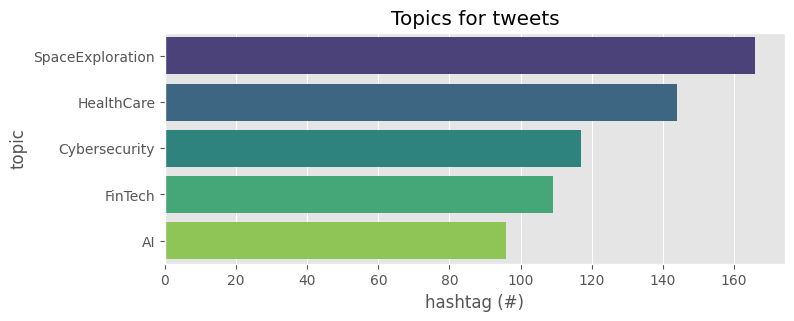

In [8]:
# rows for each topic
topics = df['topic'].value_counts()

plt.figure(figsize=(8, 3))
sns.barplot(x=topics.values, y=topics.index, hue=topics.index, palette='viridis')
plt.title("Topics for tweets")
plt.xlabel("hashtag (#)")
plt.show()

2. Users (usernames) with most tweets

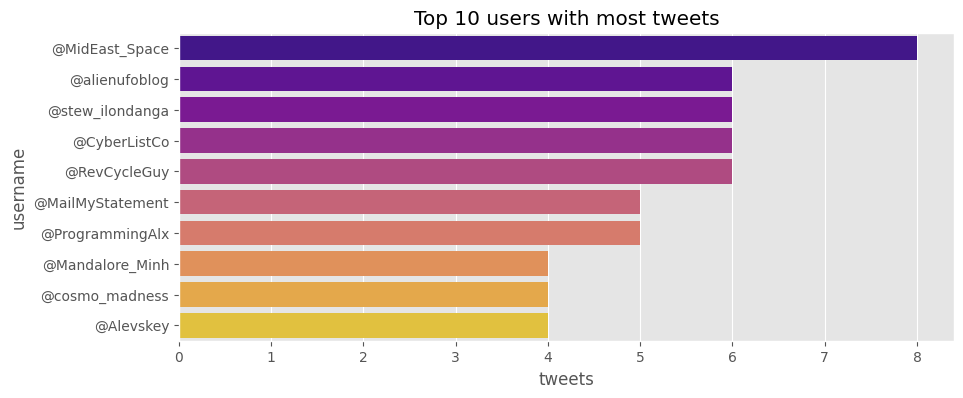

In [9]:
users = df['username'].value_counts()

top_ten_users = users[:10]
# top ten users with most tweets
plt.figure(figsize=(10, 4))
sns.barplot(x=top_ten_users.values, y=top_ten_users.index, hue=top_ten_users.index, palette='plasma')
plt.title("Top 10 users with most tweets")
plt.xlabel("tweets")
plt.show()

3. Data and Time

In [10]:
df['date'].value_counts()

date
2024-01-19    547
2024-01-17     44
2024-01-18     39
2024-01-16      2
Name: count, dtype: int64

In [11]:
from matplotlib.dates import DateFormatter

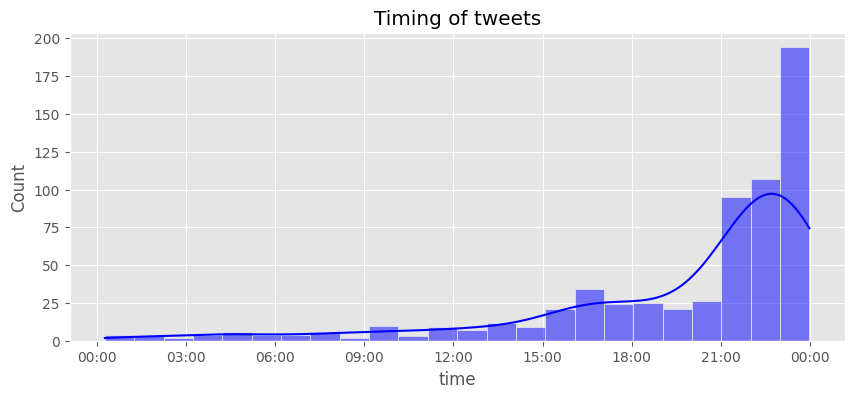

In [12]:
# time of tweets

df['time'] = pd.to_datetime(df['time'], format='%H:%M')

plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df, x='time', color='blue', bins=24, kde=True)
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.title("Timing of tweets")
plt.show()

4. Likes, Comments, and Reposts

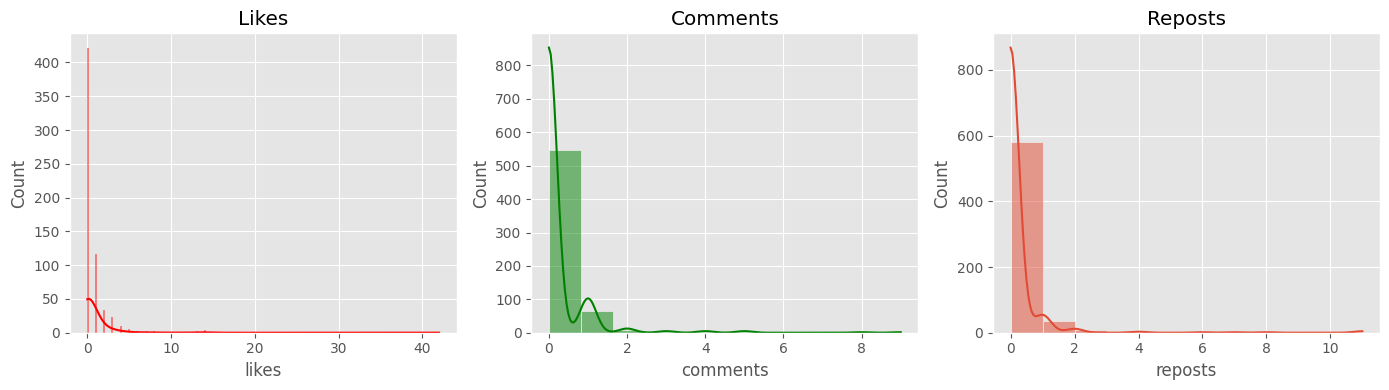

In [13]:
# Create three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='likes', kde=True, ax=axes[0], color='red')
axes[0].set_title('Likes')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='comments', kde=True, ax=axes[1], color='green')
axes[1].set_title('Comments')

# Plot on the first subplot using seaborn
sns.histplot(data=df, x='reposts', kde=True, ax=axes[2])
axes[2].set_title('Reposts')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

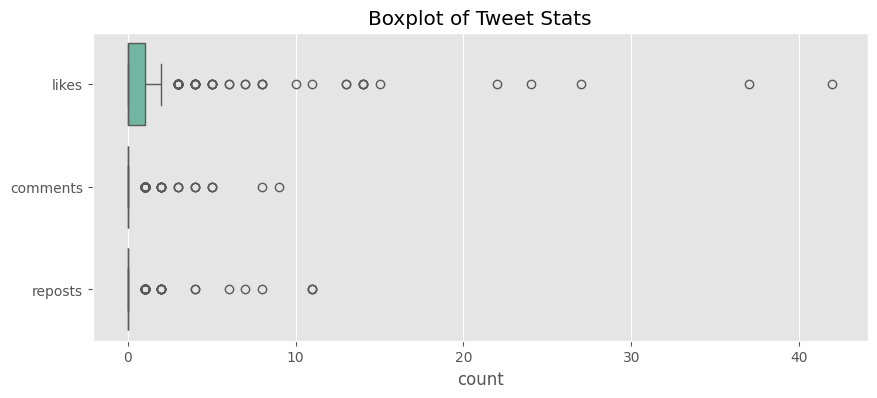

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['likes', 'comments', 'reposts']], palette='Set2', orient='h')

plt.xlabel('count')
plt.title('Boxplot of Tweet Stats')
plt.show()

## Feature Relationships

#### Bivariate Analysis

1. Topic vs Likes 

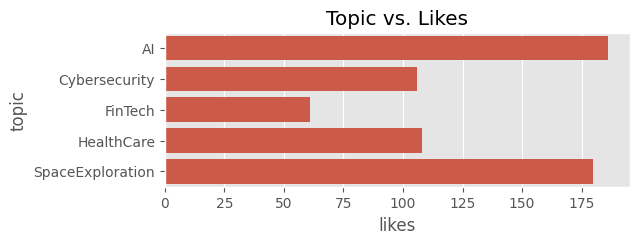

In [15]:
topic_likes = df.groupby('topic')['likes'].sum().reset_index()

plt.figure(figsize=(6, 2))
sns.barplot(y=topic_likes['topic'], x=topic_likes['likes'])
plt.title("Topic vs. Likes")
plt.show()

2. Date/Time vs Likes

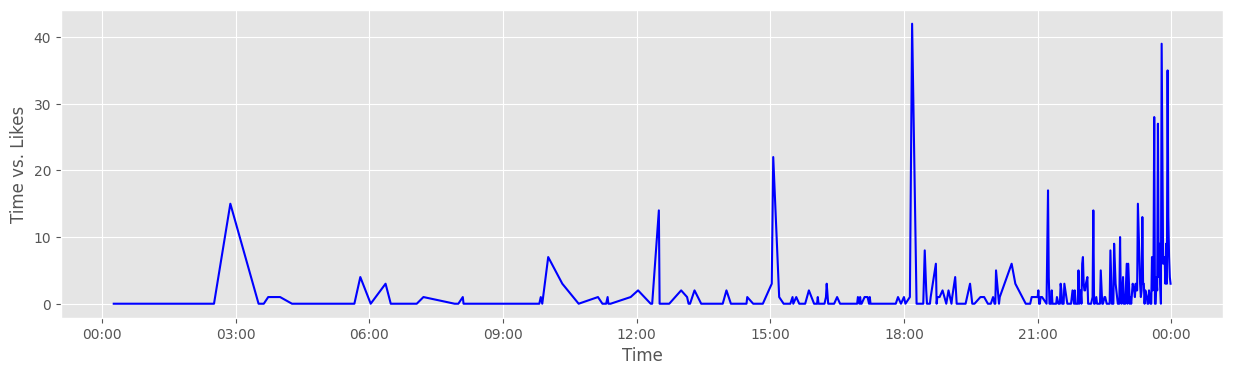

In [16]:
time_likes = df.groupby(df['time'].dt.time)['likes'].transform('sum')
plt.figure(figsize=(15, 4))
ax = sns.lineplot(data=df, x='time', y=time_likes, color='blue')
ax.set_xlabel('Time')
ax.set_ylabel('Time vs. Likes')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
plt.show()


3. Users with most Likes

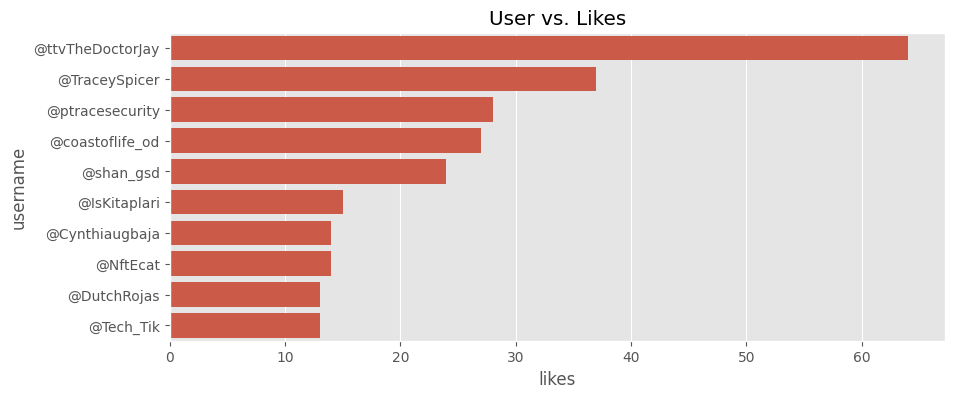

In [17]:
# top 10 users with most likes
top_users_likes = df.groupby('username')['likes'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(y=top_users_likes['username'], x=top_users_likes['likes'])
plt.title("User vs. Likes")
plt.show()

4. Tweets with the most Likes

In [18]:
# top 5 most liked tweets
most_liked_tweets = df.sort_values(by='likes', ascending=False)
most_liked_tweets.iloc[:5,:]

,profile_id,name,username,topic,text,date,time,likes,comments,reposts,theme
113,1741495248864305152,TheDoctorJay 🎮,@ttvTheDoctorJay,SpaceExploration,Good afternoon captains! Have a great day and ...,2024-01-19,1900-01-01 18:11:00,42,3,2,NaN
42,1654725905816911872,Tracey Spicer AM GAICD,@TraceySpicer,AI,I'm creating a new PowerPoint presentation to ...,2024-01-19,1900-01-01 23:47:00,37,4,1,NaN
490,1726571932080873472,Coast of Life,@coastoflife_od,HealthCare,"#ThankYouPicture Dear @DucuGavril, thank you! ...",2024-01-19,1900-01-01 23:55:00,27,3,11,NaN
78,1699919028020756480,Shannon Lindsay (she/her) 🧙‍♀️,@shan_gsd,AI,📣 Fabulous job opportunity alert! #DataAnaly...,2024-01-19,1900-01-01 23:37:00,24,2,11,NaN
236,1741495248864305152,TheDoctorJay 🎮,@ttvTheDoctorJay,SpaceExploration,Good morning captains! Have a good day and rem...,2024-01-17,1900-01-01 15:04:00,22,0,0,NaN
